<a href="https://colab.research.google.com/github/mariameneses/eda-salarios-ai-ml/blob/notebooks/codes/eda_visualizacion_salarios_ai_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><div style='padding:15px;background-color:#0097b2;color:white;border-radius:10px;font-size:110%;text-align: center'>Análisis exploratorio de datos de salarios de AI/ML </div></b>

Los datos provienen de [ai-jobs.net](https://ai-jobs.net/). Ai-jobs recolecta información de salarios, de forma anónima, de profesionales en los campos de AI/ML y Big Data, y la pone a disposición del público para que cualquiera pueda usarla, compartirla y jugar con ella.

En este cuaderno se realiza una exploración y visualización de estos datos salariales.

<br>
<div>
  <h3>Tabla de contenido</h3>
  <ol>
      <li><a href="#importarlibrerias">Importar librerías</a></li>
      <li><a href="#cargadedatos">Carga de conjunto de datos</a></li>
      <li><a href="#entendimientodatos">Entendimiento del conjunto de datos</a></li>
      <li><a href="#evaluaciondatos">Evaluación del conjunto de datos</a></li>
      <li><a href="#exploracionunivariada">Exploración univariada</a></li>
          <ol>
              <li><a href="#dissalarios">Distribución de los salarios en USD</a></li>
              <li><a href="#distitulos">Exploración de títulos de empleos</a></li>
              <li><a href="#disexperiencia">Exploración de los niveles de experiencia</a></li>
              <li><a href="#discontratacion">Exploración de los tipos de contratación</a></li>
              <li><a href="#distamaño">Exploración de los tamaños de las empresas</a></li>
              <li><a href="#disaño">Exploración de los años de pago del salario</a></li>
              <li><a href="#distipo">Exploración del tipo de trabajo</a></li>
              <li><a href="#disubicacionesempresas">Exploración de las ubicaciones de las empresas</a></li>
              <li><a href="#disubicacionesempleados">Exploración de las ubicaciones de residencia de los empleados</a></li>
          </ol>
      <li><a href="#exploracionbivariada">Exploración bivariada</a></li>
          <ol>
              <li><a href="#relcategoricaslimitadas">Relaciones entre características categóricas limitadas</a></li>
              <li><a href="#relcategoricaslimitadassalario">Relaciones entre características categóricas limitadas y el salario</a></li>
              <li><a href="#relcategoricassalario">Relaciones entre características categóricas y el salario en USD</a></li>
          </ol>
      <li><a href="#conclusiones">Conclusiones</a></li>
  </ol>
<div>

<a id='importarlibrerias'></a>
## <b><div style='padding:1%;margin:auto 30%;background-color:#d9feff;color:#0097b2;border-radius:10px;text-align:center'>Importar librerías</div></b>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

!pip install country_converter -q
import country_converter as coco

<a id='cargadedatos'></a>
## <b><div style='padding:1%;margin:auto 30%;background-color:#d9feff;color:#0097b2;border-radius:10px;text-align: center'>Carga de conjunto de datos</div></b>

In [8]:
salaries_df = pd.read_csv('/content/salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


<a id='entendimientodatos'></a>
## <b><div style='padding:1%;margin:auto 20%;background-color:#d9feff;color:#0097b2;border-radius:10px;text-align: center'>Entendimiento del conjunto de datos</div></b>

In [9]:
rows_salaries_df = salaries_df.shape[0]
cols_salaries_df = salaries_df.shape[1]
max_year = salaries_df['work_year'].max()
min_year = salaries_df['work_year'].min()

In [10]:
print(f"""
Se observa que el conjunto de datos contiene {rows_salaries_df} salarios de empleados de trabajos \
relacionados a AI/ML y Big Data entre {min_year} y {max_year}. Además, se tienen en cuenta {cols_salaries_df} \
variables de las cuales la mayoría son qualitativas
""")


Se observa que el conjunto de datos contiene 3006 salarios de empleados de trabajos relacionados a AI/ML y Big Data entre 2020 y 2023. Además, se tienen en cuenta 11 variables de las cuales la mayoría son qualitativas



<a id='evaluaciondatos'></a>
## <b><div style='padding:1%;margin:auto 25%;background-color:#d9feff;color:#0097b2;border-radius:10px;text-align: center'>Evaluación del conjunto de datos</div></b>

In [11]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3006 non-null   int64 
 1   experience_level    3006 non-null   object
 2   employment_type     3006 non-null   object
 3   job_title           3006 non-null   object
 4   salary              3006 non-null   int64 
 5   salary_currency     3006 non-null   object
 6   salary_in_usd       3006 non-null   int64 
 7   employee_residence  3006 non-null   object
 8   remote_ratio        3006 non-null   int64 
 9   company_location    3006 non-null   object
 10  company_size        3006 non-null   object
dtypes: int64(4), object(7)
memory usage: 258.5+ KB


In [12]:
print(f"Número de valores nulos en el conjunto de datos: {salaries_df.isnull().sum().sum()}")

Número de valores nulos en el conjunto de datos: 0


Se detalla que en ninguna columna hay valores nulos y sus nombres no tienen espacios

In [13]:
print("Número de valores únicos por columna:")
print(salaries_df.nunique())

Número de valores únicos por columna:
work_year               4
experience_level        4
employment_type         4
job_title              89
salary                690
salary_currency        18
salary_in_usd         893
employee_residence     76
remote_ratio            3
company_location       70
company_size            3
dtype: int64


<a id='exploracionunivariada'></a>
## <b><div style='padding:1%;margin:auto 30%;background-color:#d9feff;color:#0097b2;border-radius:10px;text-align: center'>Exploración univariada</div></b>

<a id='distsalarios'></a>
### <b><div style='padding:1%;margin:auto 60% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Distribución de los salarios en USD</div></b>

In [14]:
print("Descripción de los salarios en USD del conjunto de datos:")
print(salaries_df['salary_in_usd'].describe())

Descripción de los salarios en USD del conjunto de datos:
count      3006.000000
mean     134282.715569
std       62764.987716
min        5000.000000
25%       91427.750000
50%      130000.000000
75%      172339.500000
max      450000.000000
Name: salary_in_usd, dtype: float64


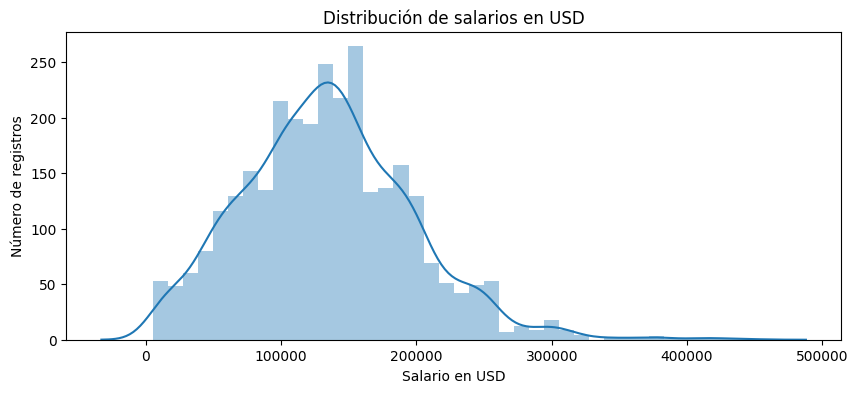

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(
    salaries_df['salary_in_usd'], kde=True, kde_kws=dict(cut=3),
     alpha=.4, edgecolor=None
)
plt.title("Distribución de salarios en USD")
plt.xlabel('Salario en USD')
plt.ylabel('Número de registros')
plt.show()

La distribución de los salarios en USD del conjunto de datos, es asimétrica a la derecha. Además, se evidencia discontinuidades en la distribución causados por la diferencia entre salarios regulares y top en los campos de AI/ML y Big Data

<a id='distitulos'></a>
### <b><div style='padding:1%;margin:auto 60% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración de títulos de empleos</div></b>

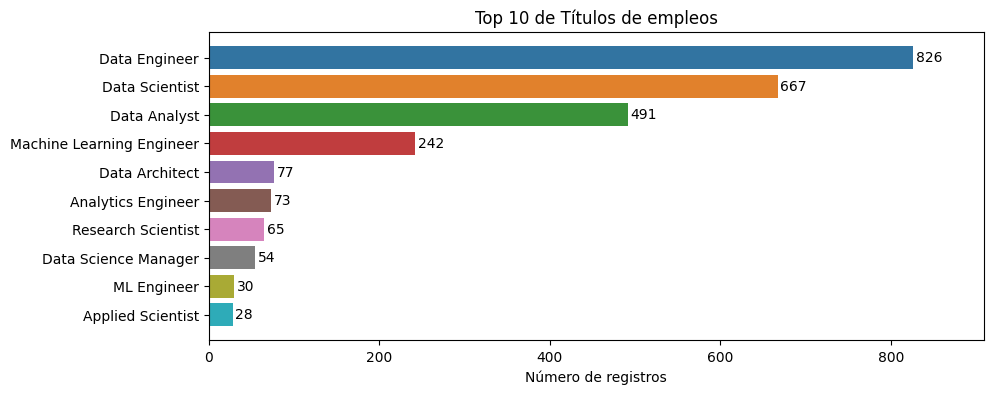

In [16]:
jobs = salaries_df['job_title'].value_counts().nlargest(10)
plt.figure(figsize=(10,4))
ax = sns.barplot(y=jobs.index, x=jobs.values)
# sns.axes_style('whitegrid')
plt.bar_label(ax.containers[0], padding=2)
plt.title('Top 10 de Títulos de empleos')
plt.xlabel('Número de registros')
plt.margins(x=0.1, y=0.05)
plt.show()

Los diez empleos más frecuentes en el conjunto de datos son: Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, Data Architect, Analytics Engineer, Research Scientist, Data Science Manager, ML Engineer, Applied Scientist.

<a id='disexperiencia'></a>
### <b><div style='padding:1%;margin:auto 55% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración de los niveles de experiencia</div></b>

In [17]:
print("Se tiene los siguientes valores únicos en la característica de niveles de experiencia:")
salaries_df['experience_level'].unique()

Se tiene los siguientes valores únicos en la característica de niveles de experiencia:


array(['EN', 'MI', 'SE', 'EX'], dtype=object)

In [18]:
# Se reemplaza los valores de 'EN', 'MI', 'SE' y 'EX', por sus definiciones
salaries_df['experience_level'] = salaries_df[
    'experience_level'
].replace('EN','Entry-level/Junior')
salaries_df['experience_level'] = salaries_df[
    'experience_level'
].replace('MI','Mid-level/Intermediate')
salaries_df['experience_level'] = salaries_df[
    'experience_level'
].replace('SE','Senior-level/Expert')
salaries_df['experience_level'] = salaries_df[
    'experience_level'
].replace('EX','Executive-level/Director')

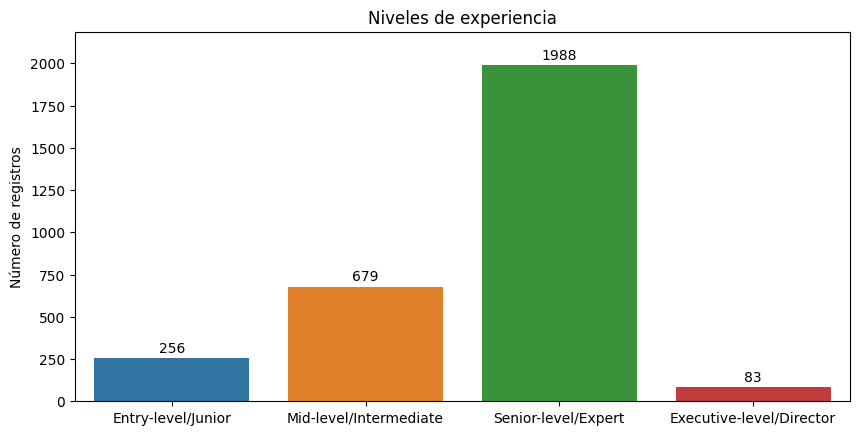

In [19]:
plt.figure(figsize=(10,4.8))
ax = sns.countplot(x=salaries_df['experience_level'])
plt.bar_label(ax.containers[0], padding=2)
plt.title('Niveles de experiencia')
plt.ylabel('Número de registros')
plt.xlabel('')
plt.margins(y=0.1)
plt.show()

Se denota que la mayoría de registros corresponden a niveles de experiencia senior o expertos, seguido por el nivel intermedio y junior, dejando al nivel ejecutivo o director como el menos frecuente en el conjunto de datos.

<a id='discontratacion'></a>
### <b><div style='padding:1%;margin:auto 55% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración de los tipos de contratación</div></b>

In [20]:
print("Se tiene los siguientes valores únicos en la característica de tipos de contratación:")
salaries_df['employment_type'].unique()

Se tiene los siguientes valores únicos en la característica de tipos de contratación:


array(['FT', 'FL', 'PT', 'CT'], dtype=object)

In [21]:
# Se reemplaza los valores de 'FT', 'FL', 'PT' y 'CT', por sus definiciones
salaries_df['employment_type'] = salaries_df[
    'employment_type'
].replace('FT','Full-time')
salaries_df['employment_type'] = salaries_df[
    'employment_type'
].replace('FL','Freelance')
salaries_df['employment_type'] = salaries_df[
    'employment_type'
].replace('PT','Part-time')
salaries_df['employment_type'] = salaries_df[
    'employment_type'
].replace('CT','Contract')

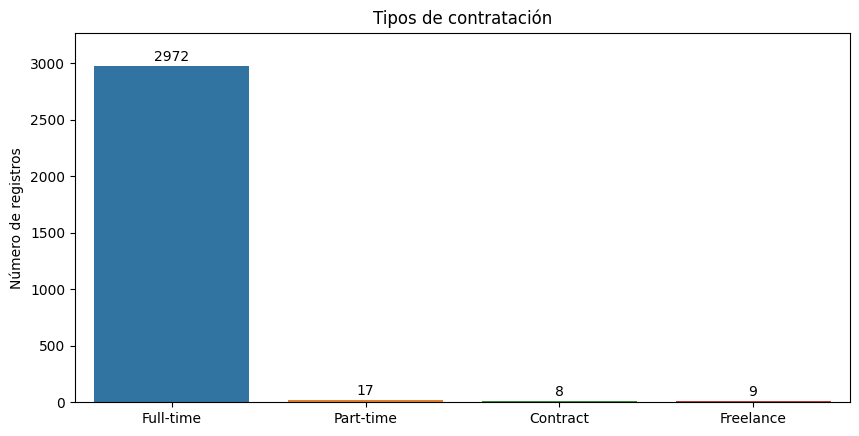

In [22]:
plt.figure(figsize=(10,4.8))
ax = sns.countplot(
    x=salaries_df['employment_type'],
    order=['Full-time', 'Part-time', 'Contract', 'Freelance']
)
plt.bar_label(ax.containers[0], padding=2)
plt.title('Tipos de contratación')
plt.ylabel('Número de registros')
plt.xlabel('')
plt.margins(y=0.1)
plt.show()

Con respecto al tipo de empleo la gran mayoría de registros corresponden a tiempo completo y solo unos cuantos registros corresponden a tiempo parcial, contrato o independiente.

<a id='distamaño'></a>
### <b><div style='padding:1%;margin:auto 55% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración de los tamaños de las empresas</div></b>

In [23]:
print("Se tiene los siguientes valores únicos en la característica de tamaño de empresa:")
salaries_df['company_size'].unique()

Se tiene los siguientes valores únicos en la característica de tamaño de empresa:


array(['M', 'L', 'S'], dtype=object)

In [24]:
# Se reemplaza los valores de 'S', 'L' y 'M', por sus definiciones
salaries_df['company_size'] = salaries_df[
    'company_size'
].replace('S','Small (<50 employees)')
salaries_df['company_size'] = salaries_df[
    'company_size'
].replace('M','Medium (from 50 to 250 employees)')
salaries_df['company_size'] = salaries_df[
    'company_size'
].replace('L','Large (>250 employees)')

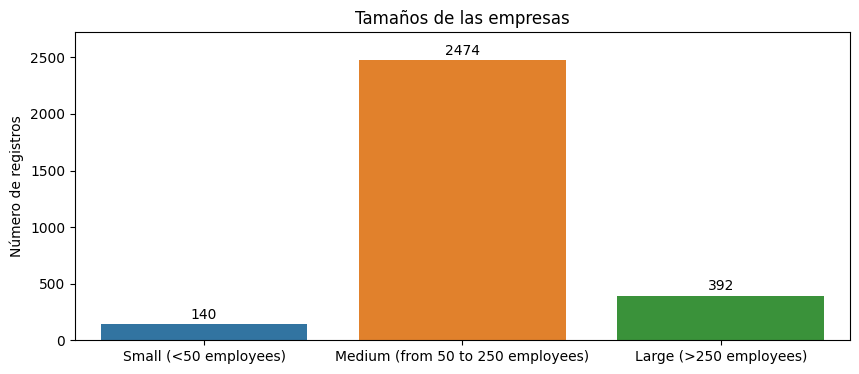

In [25]:
plt.figure(figsize=(10,4))
ax = sns.countplot(
    x=salaries_df['company_size'],
    order=[
        'Small (<50 employees)',
        'Medium (from 50 to 250 employees)',
        'Large (>250 employees)'
    ]
)
plt.bar_label(ax.containers[0], padding=2)
plt.title('Tamaños de las empresas')
plt.ylabel('Número de registros')
plt.xlabel('')
plt.margins(y=0.1)
plt.show()

Los salarios de empresas medianas son los más frecuentes en el conjunto de datos, seguidos por los salarios de empresas grandes y pequeñas.

<a id='disaño'></a>
### <b><div style='padding:1%;margin:auto 55% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración de los años de pago del salario</div></b>

In [26]:
print("Se tiene los siguientes valores únicos en la característica de los años de pago de salario:")
salaries_df['work_year'].unique()

Se tiene los siguientes valores únicos en la característica de los años de pago de salario:


array([2023, 2022, 2021, 2020])

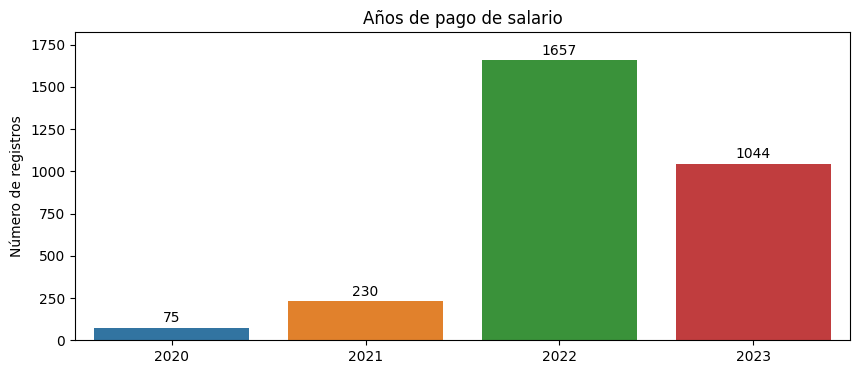

In [27]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=salaries_df['work_year'])
plt.bar_label(ax.containers[0], padding=2)
plt.title('Años de pago de salario')
plt.ylabel('Número de registros')
plt.xlabel('')
plt.margins(y=0.1)
plt.show()

Los registros corresponden en mayor cantidad a salarios pagados en los años 2022 y 2023 y en menor cantidad a salarios de los años 2021 y 2020.

<a id='distipo'></a>
### <b><div style='padding:1%;margin:auto 60% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración del tipo de trabajo</div></b>

In [28]:
print("Se tiene los siguientes valores únicos en la característica de porcentaje de trabajo remoto:")
salaries_df['remote_ratio'].unique()

Se tiene los siguientes valores únicos en la característica de porcentaje de trabajo remoto:


array([100,   0,  50])

In [29]:
# Se reemplaza los valores de '100', '50' y '0', por sus definiciones
salaries_df['remote_ratio'] = salaries_df[
    'remote_ratio'
].replace(100,'Fully remote (>80% remote)')
salaries_df['remote_ratio'] = salaries_df[
    'remote_ratio'
].replace(50,'Partially remote (from 20% to 80% remote)')
salaries_df['remote_ratio'] = salaries_df[
    'remote_ratio'
].replace(0,'No remote (<20% remote)')

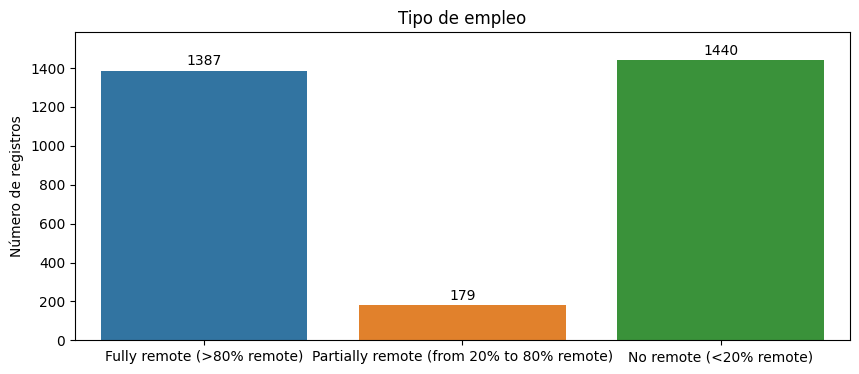

In [30]:
plt.figure(figsize=(10,4))
ax = sns.countplot(
    x=salaries_df['remote_ratio'],
    order=[
        'Fully remote (>80% remote)',
        'Partially remote (from 20% to 80% remote)',
        'No remote (<20% remote)'
    ]
)
plt.bar_label(ax.containers[0], padding=2)
plt.title('Tipo de empleo')
plt.ylabel('Número de registros')
plt.xlabel('')
plt.margins(y=0.1)
plt.show()

El tipo de trabajo compite entre no remoto y totalmente remoto y solo una pequeña parte es parcialmente remoto.

<a id='disubicacionesempresas'></a>
### <b><div style='padding:1%;margin:auto 55% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración de las ubicaciones de las empresas</div></b>

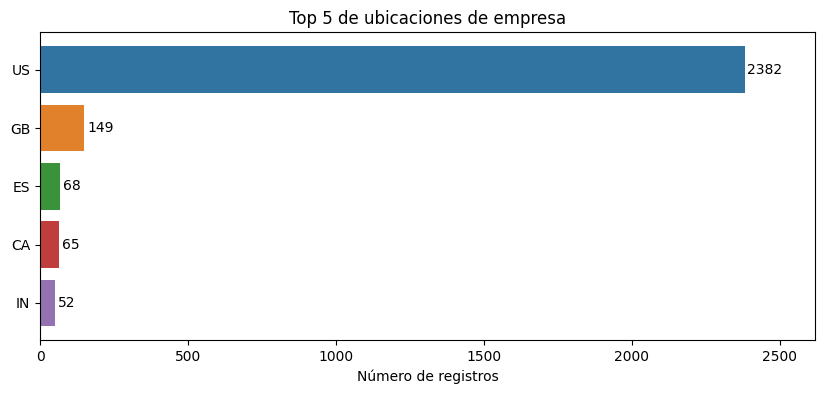

In [31]:
co_location = salaries_df['company_location'].value_counts().nlargest(5)
plt.figure(figsize=(10,4))
ax = sns.barplot(y=co_location.index, x=co_location.values)
# sns.axes_style('whitegrid')
plt.bar_label(ax.containers[0], padding=2)
plt.title('Top 5 de ubicaciones de empresa')
plt.xlabel('Número de registros')
plt.margins(x=0.1, y=0.05)
plt.show()

Las empresas se ubican principalmente en Estados unidos y en una menor medida en Gran Bretaña, España, Canadá e India.

<a id='disubicacionesempleados'></a>
### <b><div style='padding:1%;margin:auto 40% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Exploración de las ubicaciones de residencia de los empleados</div></b>

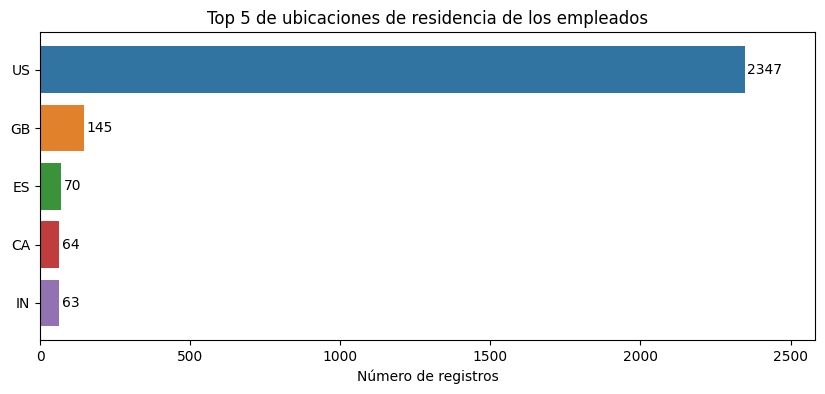

In [32]:
em_residence = salaries_df['employee_residence'].value_counts().nlargest(5)
plt.figure(figsize=(10,4))
ax = sns.barplot(y=em_residence.index, x=em_residence.values)
# sns.axes_style('whitegrid')
plt.bar_label(ax.containers[0], padding=2)
plt.title('Top 5 de ubicaciones de residencia de los empleados')
plt.xlabel('Número de registros')
plt.margins(x=0.1, y=0.05)
plt.show()

Los empleados residen principalmente en Estados unidos y en una menor medida en Gran Bretaña, España, Canadá e India.

<a id='exploracionbivariada'></a>
## <b><div style='padding:1%;margin:auto 30%;background-color:#d9feff;color:#0097b2;border-radius:10px;text-align: center'>Exploración bivariada</div></b>

Se obtienen las características categóricas limitadas

In [33]:
lim_cat_col = []
for index,value in salaries_df.nunique().items():
    if value <= 5:
        lim_cat_col.append(index)

print('características categóricas limitadas:', lim_cat_col)

características categóricas limitadas: ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']


<a id='relcategoricaslimitadas'></a>
### <b><div style='padding:1%;margin:auto 40% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Relaciones entre características categóricas limitadas</div></b>

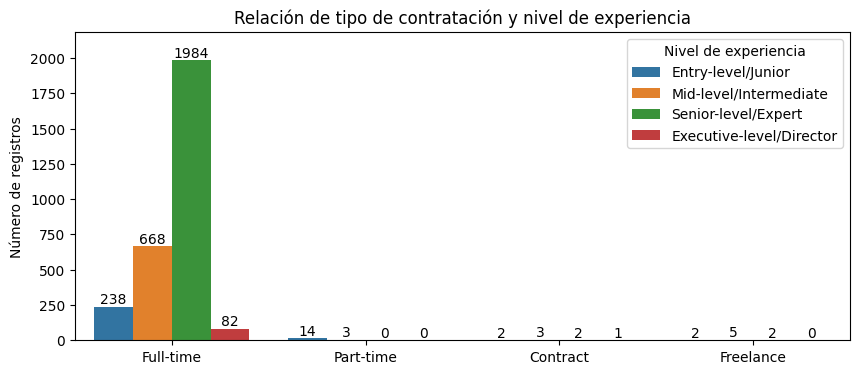

In [34]:
plt.figure(figsize=(10,4))
ax = sns.countplot(
    data=salaries_df, x='employment_type', hue='experience_level',
    order=['Full-time', 'Part-time', 'Contract', 'Freelance']
)
ax.legend(title='Nivel de experiencia')
ax.set(
    xlabel='', ylabel='Número de registros',
    title='Relación de tipo de contratación y nivel de experiencia'
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

De los empleados a tiempo completo, la mayoría tienen un nivel de experiencia de senior, seguido de un nivel medio.

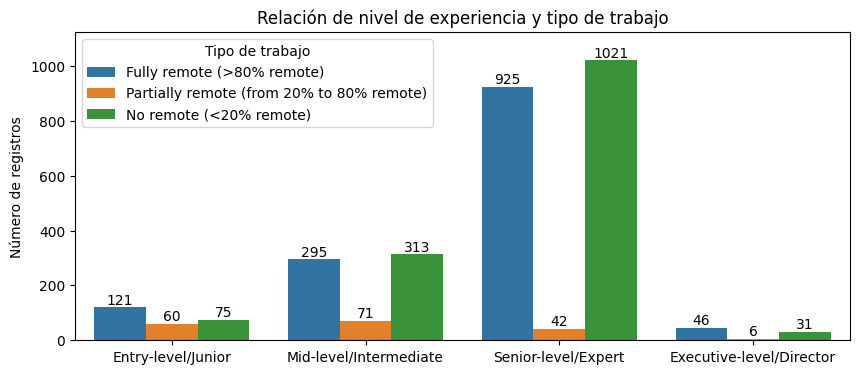

In [35]:
plt.figure(figsize=(10,4))
ax = sns.countplot(
    data=salaries_df, x='experience_level', hue='remote_ratio',
    hue_order=[
        'Fully remote (>80% remote)',
        'Partially remote (from 20% to 80% remote)',
        'No remote (<20% remote)'
    ]
)
ax.legend(title='Tipo de trabajo')
ax.set(
    xlabel='', ylabel='Número de registros',
    title='Relación de nivel de experiencia y tipo de trabajo'
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Se observa que los empleados de nivel junior presentan los tres tipos de trabajo de forma cercana, sin embargo en los demás niveles de experiencia los tipos de trabajo completamente remoto o no remoto, son más frecuentes.

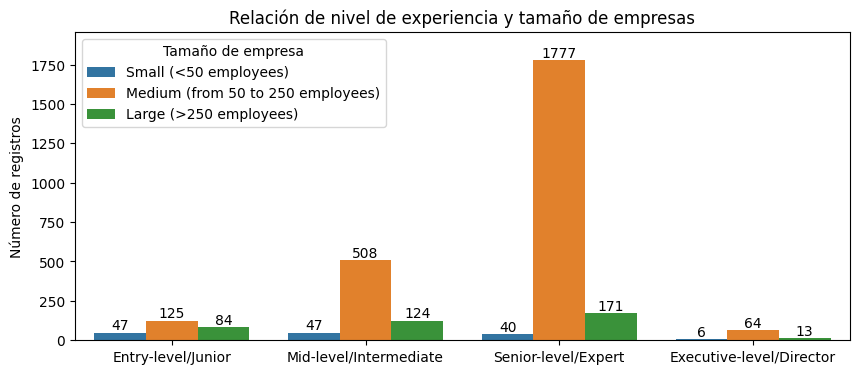

In [36]:
plt.figure(figsize=(10,4))
ax = sns.countplot(
    data=salaries_df, x='experience_level', hue='company_size',
    hue_order=[
        'Small (<50 employees)',
        'Medium (from 50 to 250 employees)',
        'Large (>250 employees)'
    ]
)
ax.legend(title='Tamaño de empresa')
ax.set(
    xlabel='', ylabel='Número de registros',
    title='Relación de nivel de experiencia y tamaño de empresas'
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

En todos los niveles de experiencia se tiene una mayor cantidad de empleados para empresas medianas que para empresas pequeñas o grandes.

<a id='relcategoricaslimitadassalario'></a>
### <b><div style='padding:1%;margin:auto 40% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Relaciones entre características categóricas limitadas y el salario</div></b>

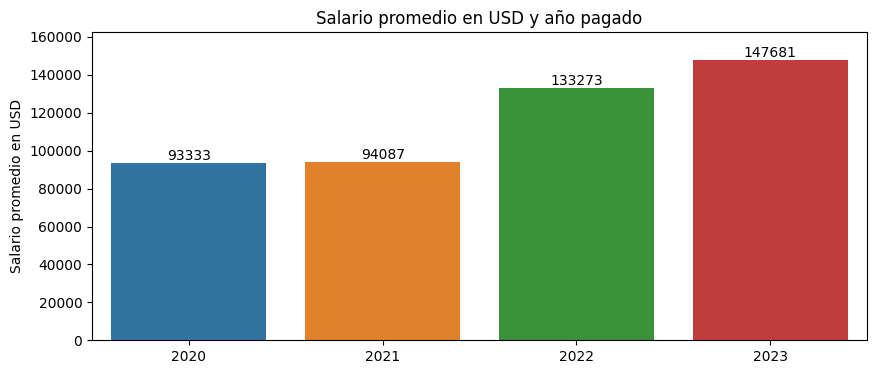

In [37]:
fig = px.box(
    salaries_df, y='salary_in_usd', x='work_year',
    template="plotly_white"
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD por año pagado",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=salaries_df, y='salary_in_usd', x='work_year',
    errorbar=None
)
ax.set(
    xlabel='', ylabel='Salario promedio en USD',
    title="Salario promedio en USD y año pagado"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Se mantienen distribuciones similares del salario en USD, entre los años 2020 - 2021 y 2022 - 2023, aunque presentan algunos datos atípicos. En promedio, se tienen salarios mayores en los años 2022 - 2023 en comparación con los años 2020 - 2021.

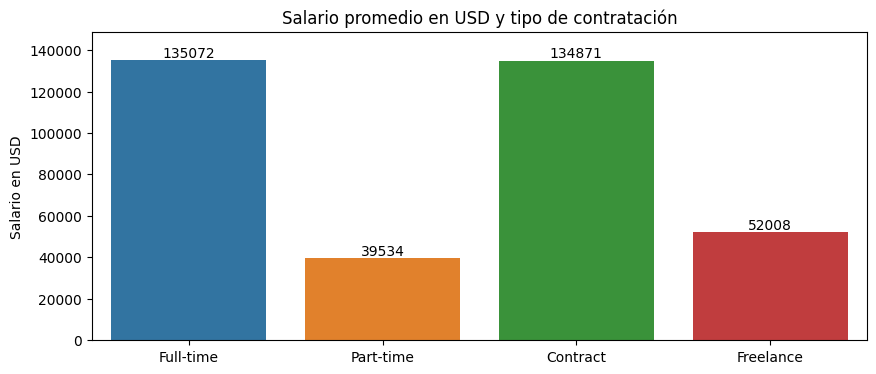

In [38]:
fig = px.box(
    salaries_df, y='salary_in_usd', x='employment_type',
    template="plotly_white",
    category_orders={
        "employment_type": [
            'Full-time', 'Part-time', 'Contract', 'Freelance'
        ]
    }
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD y tipo de contratación",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=salaries_df, y='salary_in_usd', x='employment_type',
    errorbar=None, order=['Full-time', 'Part-time', 'Contract', 'Freelance']
)
ax.set(
    xlabel='', ylabel='Salario en USD',
    title="Salario promedio en USD y tipo de contratación"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Las distribuciones del salario en USD varían bastante dependiendo del tipo de contratación. En cuanto a los tipos de contratación, "Tiempo completo" e "Independiente" exponen distribuciones simétricas en contraste con "Medio Tiempo" y "Contratista".
En promedio los tipos "Tiempo completo" y "Contratista" tienen los salarios promedios más altos y "Medio Tiempo" e "Independiente" tienen los salarios promedio más bajos.

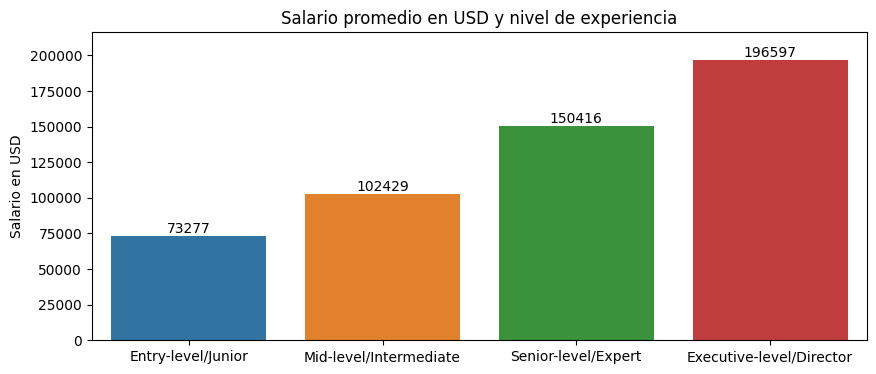

In [39]:
fig = px.box(
    salaries_df, y='salary_in_usd', x='experience_level',
    template="plotly_white",
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD y nivel de experiencia",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=salaries_df, y='salary_in_usd', x='experience_level',
    errorbar=None
)
ax.set(
    xlabel='', ylabel='Salario en USD',
    title="Salario promedio en USD y nivel de experiencia"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

La mayoría de distribuciones del salario en USD dependiendo del nivel de experiencia son simétricas aunque con algunos datos atípicos.
En promedio el salario aumenta a medida que incrementa el nivel de experiencia.

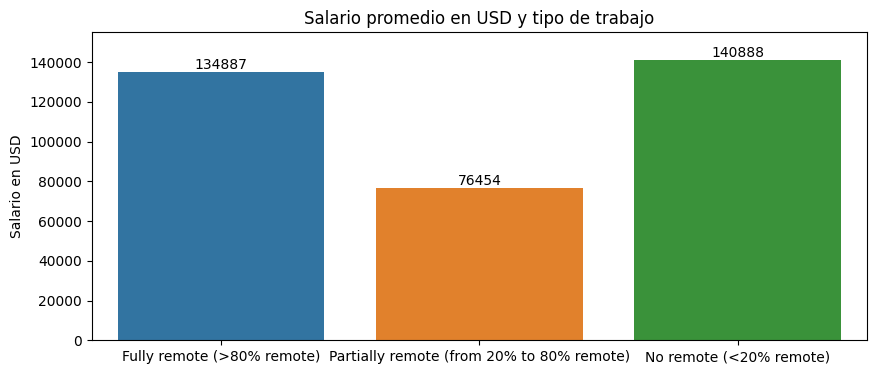

In [40]:
fig = px.box(
    salaries_df, y='salary_in_usd', x='remote_ratio',
    template="plotly_white",
    category_orders={
        "remote_ratio": [
            'Fully remote (>80% remote)',
            'Partially remote (from 20% to 80% remote)',
            'No remote (<20% remote)'
        ]
    }
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD y tipo de trabajo",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=salaries_df, y='salary_in_usd', x='remote_ratio',
    errorbar=None, order=[
        'Fully remote (>80% remote)',
        'Partially remote (from 20% to 80% remote)',
        'No remote (<20% remote)'
    ]
)
ax.set(
    xlabel='', ylabel='Salario en USD',
    title="Salario promedio en USD y tipo de trabajo"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Las distribuciones del salario en USD para el tipo de trabajo "Totalmente Remoto" y "No Remoto" son similares. Los salarios promedio también son similares en los tipos de trabajo "Totalmente Remoto" y "No Remoto", en cambio el salario promedio para el tipo "Parcialmente Remoto" es el menor.

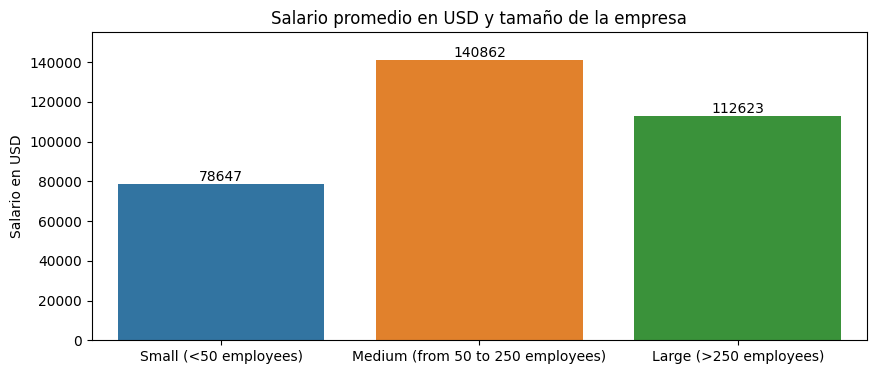

In [41]:
fig = px.box(
    salaries_df, y='salary_in_usd', x='company_size',
    template="plotly_white",
    category_orders={
        "company_size": [
            'Small (<50 employees)',
            'Medium (from 50 to 250 employees)',
            'Large (>250 employees)'
        ]
    }
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD y tamaño de la empresa",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=salaries_df, y='salary_in_usd', x='company_size',
    errorbar=None, order=[
        'Small (<50 employees)',
        'Medium (from 50 to 250 employees)',
        'Large (>250 employees)'
    ]
)
ax.set(
    xlabel='', ylabel='Salario en USD',
    title="Salario promedio en USD y tamaño de la empresa"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Las distribuciones del salario en USD son variadas en cuando a amplitud y simetría para los tres tamaños de empresa. El salario promedio más alto corresponde al tamaño de empresa "Mediana" seguido por el tamaño "Grande" y "Pequeña".

<a id='relcategoricassalario'></a>
### <b><div style='padding:1%;margin:auto 40% auto 0%;background-color:#0097b2;color:white;border-radius:10px;text-align: center'>Relaciones entre características categóricas y el salario en USD</div></b>

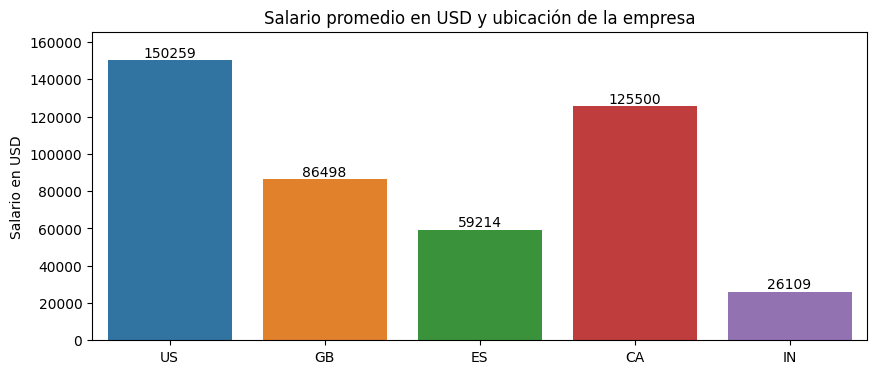

In [42]:
co_location = salaries_df['company_location'].value_counts().nlargest(5)
salaries_co_location = salaries_df[salaries_df.company_location.isin(co_location.index)]
fig = px.box(
    salaries_co_location, y='salary_in_usd', x='company_location',
    template="plotly_white", category_orders={
        "company_location": co_location.index
    }
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD y ubicación de la empresa",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=salaries_co_location, y='salary_in_usd', x='company_location',
    errorbar=None,order=co_location.index
)
ax.set(
    xlabel='', ylabel='Salario en USD',
    title="Salario promedio en USD y ubicación de la empresa"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

co_loc = salaries_df['company_location'].value_counts().nlargest(50)

salary_co_loc = salaries_df[salaries_df.company_location.isin(co_loc.index)]
salary_co_loc = salary_co_loc.groupby('company_location')['salary_in_usd'].mean()
salary_co_loc.index = coco.convert(names=salary_co_loc.index, to="ISO3")
fig = px.choropleth(
    salary_co_loc,
    locations=salary_co_loc.index,
    color=salary_co_loc.values,
    labels={'index':'Pais de empresa','color':'Salario promedio en USD'}
)
fig.update_layout(
    title_text="Salario promedio en USD y ubicación de la empresa",
    title_x=0.5
)
fig.show()

Se obsevan las distribuciones del salario en USD para los 5 paises más frecuentes en los registros de ubicación de la empresa.
La mayoría de estas distribuciones son simétricas pero variadas en amplitud, además "CA" es el único país que no presenta datos atípicos.
Los salarios promedio también son variados siendo los de las empresas ubicadas en "US" y "CA" los más altos y el salario promedio menor para las empresas ubicadas en "IN".
También, en el último diagrama se expone el salario promedio en USD por país para los 50 países más frecuentes en los registros de ubicación de las empresas.

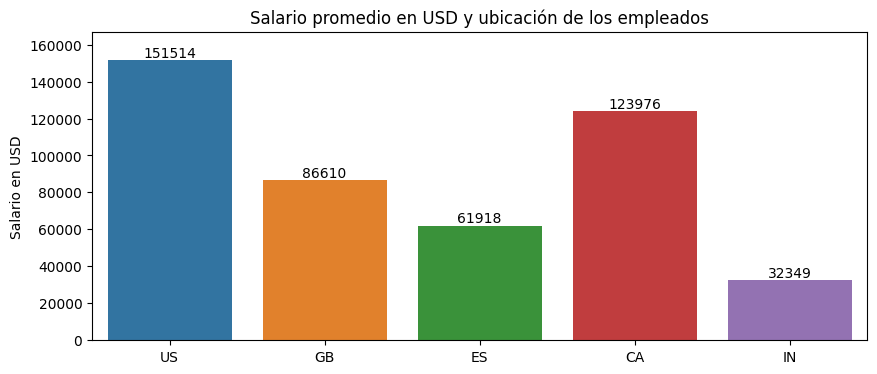

In [43]:
em_location = salaries_df['employee_residence'].value_counts().nlargest(5)
salaries_em_location = salaries_df[salaries_df.employee_residence.isin(em_location.index)]
fig = px.box(
    salaries_em_location, y='salary_in_usd', x='employee_residence',
    template="plotly_white", category_orders={
        "employee_residence": em_location.index
    }
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD y ubicación de los empleados",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=salaries_em_location, y='salary_in_usd', x='employee_residence',
    errorbar=None,order=em_location.index
)
ax.set(
    xlabel='', ylabel='Salario en USD',
    title="Salario promedio en USD y ubicación de los empleados"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

em_loc = salaries_df['employee_residence'].value_counts().nlargest(50)

salary_em_loc = salaries_df[salaries_df.employee_residence.isin(em_loc.index)]
salary_em_loc = salary_em_loc.groupby('employee_residence')['salary_in_usd'].mean()
salary_em_loc.index = coco.convert(names=salary_em_loc.index, to="ISO3")
fig = px.choropleth(
    salary_em_loc,
    locations=salary_em_loc.index,
    color=salary_em_loc.values,
    labels={'index':'Pais de empleado','color':'Salario promedio en USD'}
)
fig.show()

Se obsevan las distribuciones del salario en USD para los 5 paises más frecuentes en los registros de ubicación de los empleados.
La mayoría de estas distribuciones son simétricas pero variadas en amplitud, además "CA" es el único país que no presenta datos atípicos.
Los salarios promedio también son variados siendo los de los empleados ubicados en "US" y "CA" los más altos y el salario promedio menor para los empleados ubicados en "IN".
También, en el último diagrama se expone el salario promedio en USD por país para los 50 países más frecuentes en los registros de ubicación de los empleados.

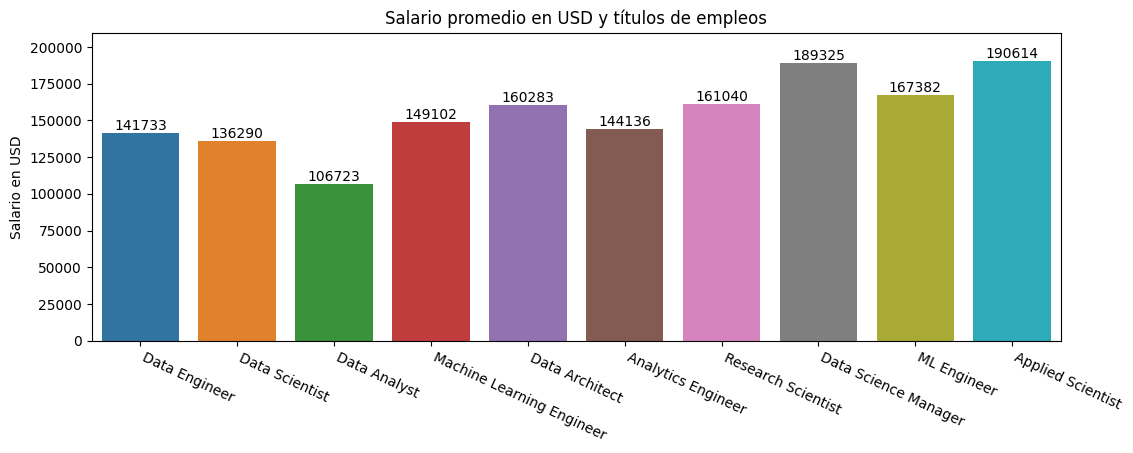

In [44]:
job_title = salaries_df['job_title'].value_counts().nlargest(10)
salaries_job_title = salaries_df[salaries_df.job_title.isin(job_title.index)]
fig = px.box(
    salaries_job_title, y='salary_in_usd', x='job_title',
    template="plotly_white", category_orders={
        "job_title": job_title.index
    }
)
fig.update_xaxes(title=None)
fig.update_yaxes(title="Salario en USD")
fig.update_layout(
    title_text="Relación de salario en USD y títulos de empleos",
    title_x=0.5
)
fig.show()


plt.figure(figsize=(12.5,4))
ax = sns.barplot(
    data=salaries_job_title, y='salary_in_usd', x='job_title',
    errorbar=None,order=job_title.index
)
ax.set(
    xlabel='', ylabel='Salario en USD',
    title="Salario promedio en USD y títulos de empleos"
)
ax.margins(y=0.1)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.xticks(rotation=-25, horizontalalignment='left')
plt.show()

Se obsevan las distribuciones del salario en USD para los 10 títulos de empleos más frecuentes en los registros.
La mayoría de estas distribuciones son similares pero variadas en amplitud y simetría, presentando también datos atípicos.
Los salarios promedio más altos corresponden a los títulos de empleo "Científico aplicado" y "Gerente de ciencia de datos" y el más bajo se presenta en el título "Analista de datos".

<a id='conclusiones'></a>
## <b><div style='padding:1%;margin:auto 30%;background-color:#d9feff;color:#0097b2;border-radius:10px;text-align: center'>Conclusiones</div></b>